## Table of Contents

#### First Section: Loading of the Data Set
  

#### Second Section: Exploratory Data Analysis (EDA)
   
   
#### Third Section: Clustering 
* A) K-Means Clustering
* B) K-Medoids
* C) DBSCAN
* D) Optics Clustering Algorithm
* E) Agglomerative Hierarchical Clustering
* F) Fuzzy C-Means Clusterings



## First Section: Loading of the Data Set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.express as px
import warnings
from plotnine import *
warnings.filterwarnings('ignore') # We can suppress the warnings

After installing the Pyton libraries, we will read in the data set our analysis will be based on. The data frame will be called "df" in the following. 

In [2]:
df = pd.read_excel('Data_Cortex_Nuclear.xls')


## Second Section: Data Exploration and Data Preperation


First step is to look at the size of the dataset. We will use the .shape function to count the number of rows and columns in the data frame.

In [3]:
df.shape

(1080, 82)

 Change the default Panda settings to be able to have a look at all columns. By default, Pandas limits the number of rows and columns it displays. 

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

To get a better idea about the variables and their distribution, we will look at the dataset with the .head() function

In [5]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.

We will use the function .info to gather further information about our data set.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

As there are 82 columns, we will look into the missing values as a next step.

### Identifying missing values in the dataset: <br>
In order to keep a better overview, we will visualize missing values per columns. Objective is to plot the variables with more and less than 10% missing values.

In [7]:
def missing_data(data, thresh=1, color='black', edgecolor='black', width=15, height=3):
     
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False)[:10].plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull()[:10].sum()/len(data))/15, thresh +8, 
             f'Columns with more than {thresh}% missing values', fontsize=12, color='darkblue',
             ha='left' ,va='top')
    plt.text(len(data.isnull()[:10].sum()/len(data))/15, thresh -3, 
             f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
             ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    
    return plt.show()

Plot the missing data accordingly

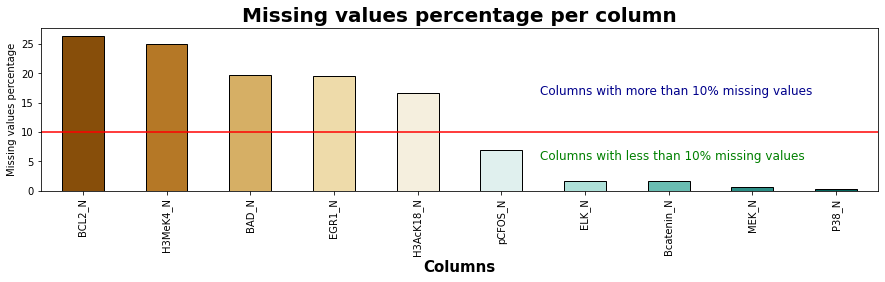

In [8]:
missing_data(df, 10, color=sns.color_palette('BrBG',10))

The threshold for missing values is depicted by the red line, in the following, all columns with more than 10% missing values will be dropped from the dataframe. We will check the shape of the dataset to compare with the new dataframe after dropping the columns.

In [9]:
df.shape

(1080, 82)

Drop columns as per above. Create a new dataframe called "df1)

In [10]:
df1 = df.dropna(how='any',axis=1,thresh=df.shape[0]*0.9)

In [11]:
df1.shape

(1080, 77)

In total we have dropped 5 variables from the original dataframe.

#### Reviewing the statistics of the variables with missing values to make decision what actions to take: <br>
First step will be to sort the variables by the number of their missing values in decending order. We will then look at their statistics in more detail.

In [12]:
df1.isnull().sum().sort_values(ascending=False)

pCFOS_N            75
ELK_N              18
Bcatenin_N         18
MEK_N               7
MTOR_N              3
ERK_N               3
GSK3B_N             3
JNK_N               3
RSK_N               3
APP_N               3
SOD1_N              3
AMPKA_N             3
CREB_N              3
pMTOR_N             3
DSCR1_N             3
DYRK1A_N            3
NR2B_N              3
pNUMB_N             3
RAPTOR_N            3
TIAM1_N             3
pP70S6_N            3
P38_N               3
TRKA_N              3
CAMKII_N            3
pERK_N              3
ITSN1_N             3
BDNF_N              3
NR1_N               3
BRAF_N              3
pAKT_N              3
pBRAF_N             3
pCAMKII_N           3
pCREB_N             3
pELK_N              3
NR2A_N              3
pJNK_N              3
pMEK_N              3
pNR1_N              3
pNR2A_N             3
pNR2B_N             3
pPKCAB_N            3
pRSK_N              3
PKCA_N              3
AKT_N               3
SHH_N               0
P3525_N   

Review statisctics for the following variables 'pCFOS_N', 'ELK_N' and 'Bcatenin_N'

In [13]:
df1['pCFOS_N'].describe()

count    1005.000000
mean        0.131053
std         0.023863
min         0.085419
25%         0.113506
50%         0.126523
75%         0.143652
max         0.256529
Name: pCFOS_N, dtype: float64

In [14]:
df1['ELK_N'].describe()

count    1062.000000
mean        1.173400
std         0.335786
min         0.497695
25%         0.944435
50%         1.096186
75%         1.323581
max         2.802948
Name: ELK_N, dtype: float64

In [15]:
df1['Bcatenin_N'].describe()

count    1062.000000
mean        2.146550
std         0.435742
min         1.134886
25%         1.826707
50%         2.114769
75%         2.423875
max         3.680552
Name: Bcatenin_N, dtype: float64

#### The next step is to replace null values in the variables with their respective mean values

In [16]:
df2 = df1.fillna(df1.mean())

Double-check if missing values have been filled accordingly.

In [17]:
df2.isnull().sum().sort_values(ascending=False)

MouseID            0
S6_N               0
nNOS_N             0
ERBB4_N            0
ARC_N              0
BAX_N              0
RRP1_N             0
AcetylH3K9_N       0
ADARB1_N           0
CDK5_N             0
NR2B_N             0
pPKCG_N            0
pGSK3B_N           0
P70S6_N            0
NUMB_N             0
pP70S6_N           0
TIAM1_N            0
RAPTOR_N           0
Tau_N              0
GFAP_N             0
GluR3_N            0
GluR4_N            0
Behavior           0
Treatment          0
Genotype           0
CaNA_N             0
SYP_N              0
pCFOS_N            0
pS6_N              0
SHH_N              0
pGSK3B_Tyr216_N    0
Ubiquitin_N        0
SNCA_N             0
PSD95_N            0
pCASP9_N           0
P3525_N            0
IL1B_N             0
pNUMB_N            0
AMPKA_N            0
DYRK1A_N           0
pELK_N             0
pNR2B_N            0
pNR2A_N            0
pNR1_N             0
pMEK_N             0
PKCA_N             0
pJNK_N             0
pERK_N       

#### Checking for duplicates: <br>
Next, we will check if there is any duplicate data in our data set. We will create a new data frame called "duplicateRowsdf" to check and store duplicated rows in our data set. As a next step we will check for the shape of the duplicated values.

In [18]:
duplicateRowsdf = df2[df2.duplicated()]
print(duplicateRowsdf)


Empty DataFrame
Columns: [MouseID, DYRK1A_N, ITSN1_N, BDNF_N, NR1_N, NR2A_N, pAKT_N, pBRAF_N, pCAMKII_N, pCREB_N, pELK_N, pERK_N, pJNK_N, PKCA_N, pMEK_N, pNR1_N, pNR2A_N, pNR2B_N, pPKCAB_N, pRSK_N, AKT_N, BRAF_N, CAMKII_N, CREB_N, ELK_N, ERK_N, GSK3B_N, JNK_N, MEK_N, TRKA_N, RSK_N, APP_N, Bcatenin_N, SOD1_N, MTOR_N, P38_N, pMTOR_N, DSCR1_N, AMPKA_N, NR2B_N, pNUMB_N, RAPTOR_N, TIAM1_N, pP70S6_N, NUMB_N, P70S6_N, pGSK3B_N, pPKCG_N, CDK5_N, S6_N, ADARB1_N, AcetylH3K9_N, RRP1_N, BAX_N, ARC_N, ERBB4_N, nNOS_N, Tau_N, GFAP_N, GluR3_N, GluR4_N, IL1B_N, P3525_N, pCASP9_N, PSD95_N, SNCA_N, Ubiquitin_N, pGSK3B_Tyr216_N, SHH_N, pS6_N, pCFOS_N, SYP_N, CaNA_N, Genotype, Treatment, Behavior, class]
Index: []


Next, we will apply the describe() function to obtain the summary and distribution information about our variables. As we have categorical variables, we need to use the include=object parameter in the describe() function to apply it to the qualitative data. We will do this in separate lines.

In [19]:
df2.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,0.545904,0.313505,0.317939,0.275033,0.825813,0.726933,1.561965,1.525338,0.442848,0.682236,0.378519,0.363357,0.180492,1.173400,2.474492,1.172603,0.241644,0.272789,0.693180,0.168417,0.404808,2.146550,0.542635,0.452459,0.415311,0.759047,0.585186,0.368370,0.565317,0.357095,0.315813,0.418605,0.394475,0.181080,0.943116,0.161211,1.706599,0.292434,0.429226,1.197420,0.216482,0.166631,0.179307,0.121521,0.156478,0.181300,0.210489,0.120889,0.221851,0.126560,0.527349,0.291276,1.548348,2.235236,0.159821,1.239270,0.848767,0.226676,0.121521,0.131053,0.446073,1.337784
std,0.249015,0.251290,0.049314,0.346810,0.931802,0.041577,0.027004,1.293368,0.032542,0.466254,0.344829,0.051906,0.052164,0.046099,0.117805,0.187752,0.270361,0.481110,0.066579,0.127257,0.216087,0.052279,0.026334,0.332973,0.652488,0.244411,0.033854,0.040942,0.120657,0.028099,0.061088,0.432092,0.280178,0.065397,0.089166,0.122276,0.100461,0.062496,0.088079,0.062938,0.054087,0.067194,0.155953,0.029296,0.172838,0.019308,0.578442,0.037380,0.137440,0.361743,0.185309,0.031896,0.018826,0.014276,0.015071,0.024919,0.069010,0.013233,0.034886,0.026885,0.082057,0.030015,0.248132,0.254395,0.024150,0.173580,0.094311,0.028989,0.014276,0.023018,0.066432,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,0.149155,0.052110,0.191431,0.056818,0.500160,0.281285,0.301609,0.567840,0.095942,0.064421,0.143894,0.212960,0.113636,0.497695,1.131796,0.151124,0.046298,0.147201,0.198743,0.107394,0.235595,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.117999,0.344120,0.099976,0.598767,0.181157,0.130206,0.529108,0.052528,-0.062008,0.072326,0.067254,0.100217,0.099734,0.096233,0.086114,0.111382,0.072580,0.284001,0.207438,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.067254,0.085419,0.258626,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,0.337486,0.281530,0.281850,0.244294,0.743594,0.591311,1.381308,1.168648,0.404152,0.597317,0.264356,0.330887,0.161867,0.947889,1.993693,1.023321,0.220425,0.247322,0.617329,0.149639,0.366469,1.830090,0.319712,0.410961,0.352023,0.683557,0.531223,0.326750,0.515099,0.312771,0.276193,0.372059,0.282131,0.159334,0.826742,0.149253,1.296830,0.272594,0.316684,0.930548,0.103571,0.149025,0.168172,0.110839,0.146969,0.166451,0.167991,0.112765,0.195665,0.108895,0.475634,0.270059,1.375598,2.079338,0.142838,1.116262,0.793739,0.206395,0.1108

In [20]:
df2.describe(include='object')

,MouseID,Genotype,Treatment,Behavior,class
count,1080,1080,1080,1080,1080
unique,1080,2,2,2,8
top,309_1,Control,Memantine,S/C,c-CS-m
freq,1,570,570,555,150


###### We are dropping the variable 'MouseID' as there is no value in this variable for our further analysis

In [21]:
df2 = df2.drop('MouseID', axis=1)

#### Visualization of the distribution of categorical variables:

Variable 'Genotype'

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64


Text(0.5, 1.0, 'Distribution of Genotype')

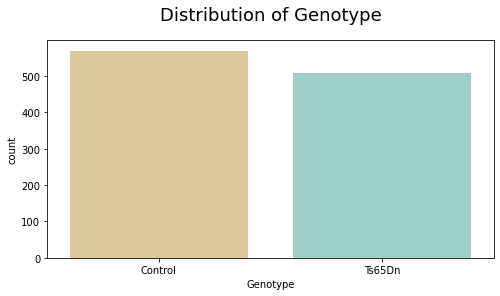

In [22]:
print(df2['Genotype'].value_counts())

plt.figure(figsize=(8, 4)) 
ax = sns.countplot(x='Genotype',data=df2, palette='BrBG')
ax.set_title('Distribution of Genotype', fontsize=18, pad=20)

Variable 'Treatment'

Memantine    570
Saline       510
Name: Treatment, dtype: int64


Text(0.5, 1.0, 'Distribution of Treatment')

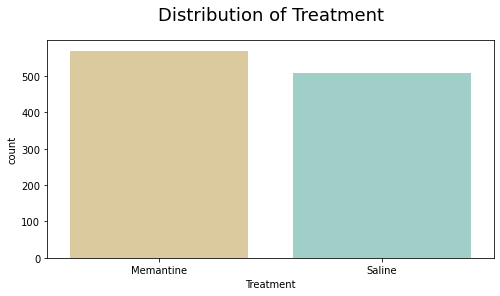

In [23]:
print(df2['Treatment'].value_counts())

plt.figure(figsize=(8, 4)) 
ax = sns.countplot(x='Treatment',data=df2, palette='BrBG')
ax.set_title('Distribution of Treatment', fontsize=18, pad=20)

Variable 'Behavior'

S/C    555
C/S    525
Name: Behavior, dtype: int64


Text(0.5, 1.0, 'Distribution of Behavior')

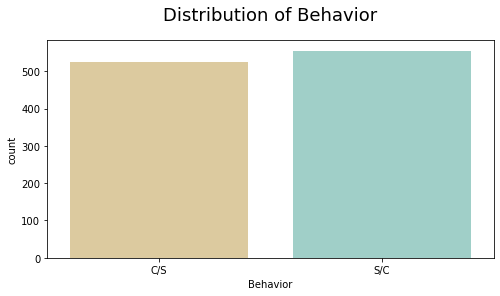

In [24]:
print(df2['Behavior'].value_counts())

plt.figure(figsize=(8, 4)) 
ax = sns.countplot(x='Behavior',data=df2, palette='BrBG')
ax.set_title('Distribution of Behavior', fontsize=18, pad=20)

Variable 'class'

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64


Text(0.5, 1.0, 'Distribution of Class')

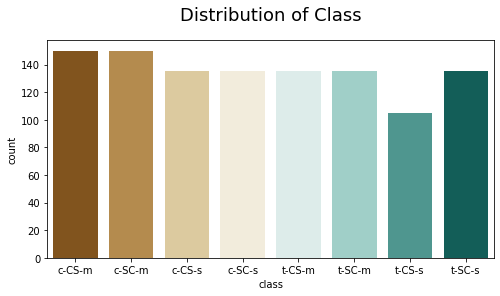

In [25]:
print(df2['class'].value_counts())

plt.figure(figsize=(8, 4)) 
ax = sns.countplot(x='class',data=df2, palette='BrBG')
ax.set_title('Distribution of Class', fontsize=18, pad=20)

## Prepare dataset to apply Clustering algorithm and models

#### 1st step is to split the dataframe into independent variables and target data: <br>
We will create "X" including the independent variables, and variable "y1" including only the target variable "class"

In [26]:
X = df2.drop('class',axis=1)
y1 = df2[['class']]

#### Encoding categorical variables:

To be able to apply clustering algorithm, we have to encode categorical data into numerical.

In [27]:
classes = {"class":     {"c-CS-m": 0, "c-SC-m": 1, 'c-CS-s': 2, 'c-SC-s': 3, 't-CS-m':4, 't-SC-m':5,
                            't-SC-s':6, 't-CS-s':7}}
y = y1.replace(classes)
y.head()

,class
0,0
1,0
2,0
3,0
4,0


Check and reset the index of the new dataframe

In [28]:
y = pd.DataFrame(y)

In [29]:
y.reset_index()


,index,class
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1075,1075,6
1076,1076,6
1077,1077,6
1078,1078,6


We will look at the distribution of the "class" variable

In [30]:
y.columns

Index(['class'], dtype='object')

In [31]:
y['class'].value_counts()

0    150
1    150
2    135
3    135
4    135
5    135
6    135
7    105
Name: class, dtype: int64

Checking the shape, datatype and missing values of variable "class"

In [32]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   1080 non-null   int64
dtypes: int64(1)
memory usage: 8.6 KB


#### For the independent variables in dataframe "X", we are using the get_dummies method to prepare the categorical data:

In [33]:
X = pd.get_dummies(data=X,columns=["Treatment","Behavior", "Genotype"])

Checking the new variables for dataframe "X"

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 78 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DYRK1A_N             1080 non-null   float64
 1   ITSN1_N              1080 non-null   float64
 2   BDNF_N               1080 non-null   float64
 3   NR1_N                1080 non-null   float64
 4   NR2A_N               1080 non-null   float64
 5   pAKT_N               1080 non-null   float64
 6   pBRAF_N              1080 non-null   float64
 7   pCAMKII_N            1080 non-null   float64
 8   pCREB_N              1080 non-null   float64
 9   pELK_N               1080 non-null   float64
 10  pERK_N               1080 non-null   float64
 11  pJNK_N               1080 non-null   float64
 12  PKCA_N               1080 non-null   float64
 13  pMEK_N               1080 non-null   float64
 14  pNR1_N               1080 non-null   float64
 15  pNR2A_N              1080 non-null   f

#### To prepare the dataframe "X" for further processing, we will scale the data: <br>
We will use the MinMaxScaler imported from the sklearn library. We will create a new dataframe called "df_scaled".

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(X)

In [36]:
df_scaled = pd.DataFrame(df_scaled)

In [37]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,0.157643,0.576167,0.747688,0.598504,0.574775,0.286697,0.650637,0.698164,0.622784,0.711198,0.136915,0.419649,0.317149,0.593715,0.627907,0.596269,0.640167,0.643070,0.766146,0.295596,0.549817,0.747441,0.092035,0.541196,0.152338,0.687269,0.553922,0.467278,0.509996,0.469461,0.436170,0.506018,0.163368,0.323059,0.373254,0.604516,0.303363,0.178458,0.324085,0.402810,0.083584,0.327870,0.690257,0.426816,0.412721,0.477834,0.057168,0.228825,0.531163,0.151103,0.242608,0.169702,0.432843,0.483783,0.044770,0.256699,0.405228,0.162941,0.426816,0.133930,0.336299,0.705738,1.0,0.0,1.0,0.0,1.0,0.0
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,0.159721,0.559556,0.688545,0.559598,0.502766,0.270688,0.587926,0.591606,0.629311,0.689095,0.128911,0.383669,0.291583,0.548032,0.578736,0.584234,0.614355,0.586180,0.724593,0.251840,0.491969,0.701976,0.075589,0.467650,0.137451,0.621033,0.512117,0.409897,0.457694,0.410046,0.383101,0.447496,0.145594,0.322736,0.376914,0.618918,0.302059,0.177452,0.324004,0.386524,0.084514,0.326426,0.664894,0.429952,0.463251,0.488028,0.075103,0.251911,0.576828,0.149555,0.285860,0.212421,0.472327,0.477640,0.054452,0.226088,0.433471,0.220010,0.429952,0.110434,0.365208,0.749771,1.0,0.0,1.0,0.0,1.0,0.0
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,0.154554,0.541938,0.670905,0.560573,0.554483,0.283848,0.590443,0.581558,0.669753,0.670907,0.128651,0.415579,0.292676,0.549983,0.599925,0.580790,0.625756,0.613502,0.730384,0.270560,0.472444,0.710718,0.076445,0.470688,0.137475,0.616142,0.510175,0.375653,0.467725,0.400225,0.356363,0.432379,0.125773,0.334325,0.383316,0.657565,0.332565,0.189744,0.369553,0.373234,0.094486,0.312439,0.700212,0.448652,0.415863,0.475009,0.071718,0.248192,0.607535,0.150434,0.373879,0.202733,0.467603,0.484953,0.044526,0.214719,0.429387,0.186816,0.448652,0.121560,0.353621,0.868229,1.0,0.0,1.0,0.0,1.0,0.0
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,0.127028,0.554293,0.657048,0.640641,0.413245,0.211238,0.522319,0.627585,0.687775,0.593408,0.121509,0.401866,0.319599,0.342080,0.452058,0.545716,0.625528,0.492220,0.667283,0.277208,0.440780,0.536330,0.076936,0.479533,0.144945,0.605654,0.514305,0.338199,0.461189,0.406715,0.402786,0.422989,0.267936,0.220414,0.311501,0.549444,0.364189,0.181101,0.231762,0.333033,0.076248,0.338264,0.669358,0.392700,0.372772,0.397939,0.053257,0.245676,0.562594,0.156083,0.242672,0.184790,0.364359,0.449304,0.119259,0.208943,0.407971,0.179047,0.392700,0.151031,0.265619,0.721879,1.0,0.0,1.0,0.0,1.0,0.0
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,0.117572,0.532161,0.608970,0.551236,0.401706,0.200364,0.486489,0.579839,0.698127,0.557701,0.112407,0.381348,0.297196,0.358746,0.433909,0.519977,0.599623,0.471524,0.627685,0.239874,0.410395,0.519186,0.067645,0.436522,0.121261,0.548237,0.501294,0.283304,0.416698,0.372548,0.353712,0.374357,0.262839,0.212521,0.317400,0.559551,0.376199,0.181805,0.258720,0.337126,0.079697,0.330219,0.686524,0.410187,0.385008,0.422195,0.080162,0.234762,0.656300,0.147044,0.325597,0.187625,0.393332,0.480334,0.116965,0.215528,0.480342,0.245702,0.410187,0.147711,0.350381,0.812053,1.0,0.0,1.0,0.0,1.0,0.0


In [38]:
df_scaled.shape

(1080, 78)

The new dataframe "df_scaled" contains 1080 rows of observations and 78 variables that have been encoded and scaled between zero and one (default of MinMax Scaler).

# Third Section: Machine Learning Models <br>
In the following we will apply different clustering models 

## A) K-means Clustering

#### As the first step, we will have to choose the number of clusters K. We will use Elbow method to determine them <br>
##### Application of Elbow method to find best suitable number of clusters for our dataset

K-means Clustering: predictions are based on the number of centroids present (K) and nearest mean values, given an Euclidean Distance measurement between observations.

First: install yellowbrick to use for Clustering Visualization

In [39]:
#! pip install yellowbrick

#### In the following we will use the Inertia and Silhouette Score to evaluate best K-means model

To consider for interpretation: <br>
<b> Inertia </b> measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. <br>
A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet#:~:text=Inertia%20measures%20how%20well%20a,number%20of%20clusters%20(%20K%20).


To consider for interpretation of the Silhouette Score: <br>
The Silhouette Score is a measure of Cohesion and Seperation of clusters. <br>
The <b> silhouette score </b> falls within range [-1,1] <br>
The silhouette score of 1 means that the clusters are very dense and nicely separated and have strong cohesion and seperation. The score o means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

Next, we will be analysing the Silhouette Score using Silhouette Visualizer method to decide how many clusters give the best score. <br>
We will also install sklearn.utils and -U imbalanced-learn from the sklearn library.

In [40]:
#! pip install sklearn.utils
#!pip install -U imbalanced-learn

From sklearn library we will import KMeans as well as silhouette_score

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

Plot subplots with the Silhouette Visualizer

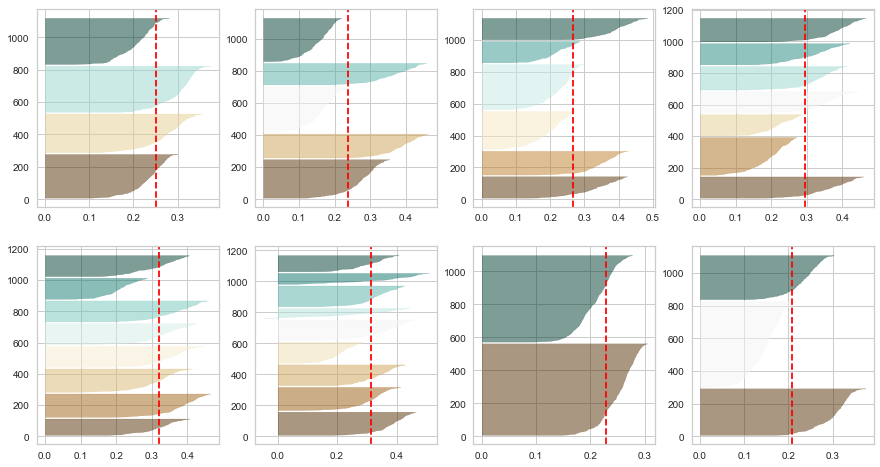

In [42]:
fig, ax = plt.subplots(2,4, figsize=(15,8))
for i in [2,3,4,5,6,7,8,9]:
    km = KMeans(n_clusters=i, init = 'k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 4)
    
    visualizer = SilhouetteVisualizer(km, colors='BrBG', ax=ax[q-1][mod])
    visualizer.fit(df_scaled)

 In addition, we will check the best silhouette score using Elbow Method on the df_sclaed dataframe.

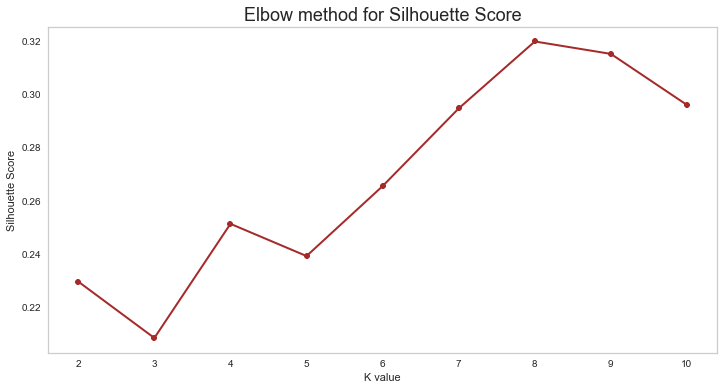

In [43]:
sil = []

for i in [2,3,4,5,6,7,8,9,10]:
    km = KMeans(n_clusters=i, init = 'k-means++', n_init=10, max_iter=100, random_state=42)
    km.fit(df_scaled)
    sil.append(silhouette_score(df_scaled, km.predict(df_scaled)))
    
plt.figure(figsize=(12,6))
plt.grid()
plt.plot([2,3,4,5,6,7,8,9,10], sil, linewidth=2, color='brown', marker = '8')
plt.xlabel('K value')
plt.ylabel('Silhouette Score')
plt.title('Elbow method for Silhouette Score', fontsize=18)
plt.show()


Based on the above we can clearly see that the highest Silhouette Score we can get while running Kmeans clustering using 8 clusters.

#### Checking the best number of clusters with Inertia:

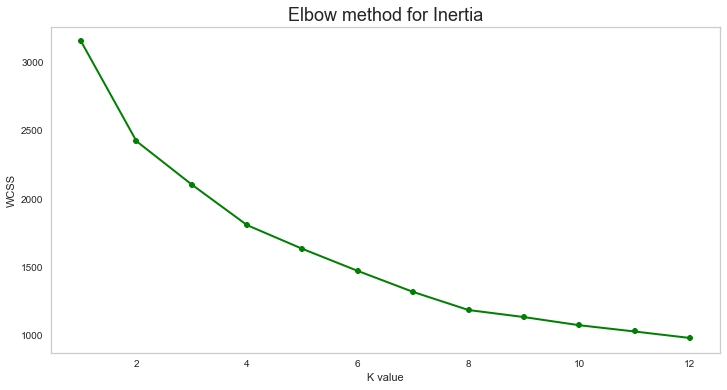

In [44]:
wcss=[]

for k in range(1,13):
    kmeans = KMeans(n_clusters=k, init ='k-means++')
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,13), wcss, linewidth=2, color='green', marker = '8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.title('Elbow method for Inertia', fontsize=18)
plt.show()

We can conclude that if we will take into consideration both Silhouette Score and Inertia(WCSS)thatbest number of clusters for our dataset is 8.

## Apply  K-means with 8 clusters to raw data 

In [45]:
kmeans_1 = KMeans(n_clusters=8, random_state=42)
kmeans_1 = kmeans_1.fit(df_scaled)
inertia_1 = kmeans_1.inertia_
print('The clusters are:  ', kmeans_1.labels_)
print('The Inertia is:   ', kmeans_1.inertia_ )


The clusters are:   [2 2 2 ... 7 7 7]
The Inertia is:    1182.580135026758


In the following we will make predictions for new data, with new clusters created. We will first calculate the counts of the cluster and then create a data frame called "countscldf_1". As a last step, we will print the new data frame countscldf_1

In [46]:
km_label_1 = kmeans_1.predict(df_scaled)


unique, counts1 = np.unique(km_label_1, return_counts=True)
counts1 = counts1.reshape(1,8)


countscldf_1 = pd.DataFrame(counts1, columns= ['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3',
                                            'Cluster 4', 'Cluster 5','Cluster 6', 'Cluster 7'])


countscldf_1

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
0,105,150,150,135,135,135,135,135


Display the silhouette score value

In [47]:
silh_score_1 = silhouette_score(df_scaled, km_label_1)
print(f'Silhouette Score(n = 2): {silhouette_score(df_scaled, km_label_1)}')

Silhouette Score(n = 2): 0.31981543590845335


The results are not good, the Inertia is very high and the silhouette score not far from zero. <br>
Next, we will apply PCA algorithm to our raw data to see if applying clustering to the new dataframe will improve the results.

### Principal Component Analysis (PCA) <br>

Dimensionality reduction algorithms capture
the salient information in the original data while reducing the size of the dataset. As we move from a high number of dimensions to a lower number, the noise in
the dataset is minimized because the dimensionality reduction algorithm needs to capture the most important aspects of the original data and
cannot devote attention to infrequently occurring elements. <br>

References:
Patel, A (2019). Hands-On Unsupervised Learning Using Python. USA: O’Reilly Media, Inc.. 166.

The goal of PCA is to extract the most important information from the data table by compressing the size of the data and keeping only the important information. 

* The first principal component is required to have the largest possible variance (inertia) and therefore this component will explain the largest part of the inertia/variance of the data, hence the less principal components you have the lower the inertia will be after PCA.<br>
* For every new component, the inertia will increase since the rotations are always performed in a subspace and the new axes will always explain less inertia than the original components. <br>
* Inertia should not be the criterium to choose the optimal number of principal component since the lower the components are the lower the inertia will be. <br>
* the rule of thumb is that 80% explained variance should be the criterium when choosing the number of principal components.

#### Objective is to identify the 'best' number of components for our data set. We are aiming to extract the number of components that will explain 80% of variance of our data: <br>
First we will import the PCA and LinearDiscriminantAnalysis (LDA) from sklearn library, and then will fit the df_sclaed dataframe.

In [48]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

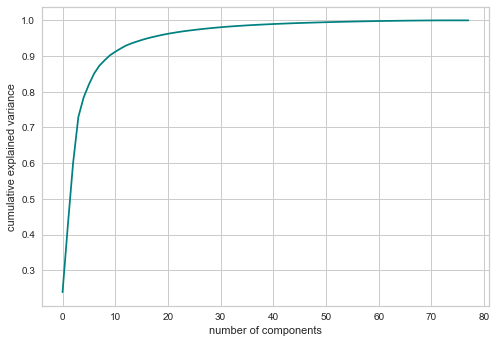

In [49]:
pca = PCA().fit(df_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='teal') 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [50]:
pca = PCA(0.80).fit(df_scaled)
pca.n_components_ 

6

In [51]:
pca = PCA(0.39).fit(df_scaled)
pca.n_components_ 

2

We have found out that to keep 80% of explained variance from our dataframe, we should perform PCA with 6 components. In case  we would decide to implement PCA with two components only (that way it would be easy to visualise our data, as we would have only a 2-dimensional space), we would be left with only 39% variance explained. This would mean, we loose lots of signal from our original data and has to be taken into account.

### Apply K-means with 8 clusters on data after PCA with 6 components <br>
To compare to our previous clustering implementations, we will use the Inertia score.

In [52]:
pca = PCA(n_components=6, random_state=42)
df_pca_1 = pca.fit(df_scaled).transform(df_scaled)

kmeans_2 = KMeans(n_clusters=8, random_state=42)
kmeans_2 = kmeans_2.fit(df_pca_1)
inertia_2 = kmeans_2.inertia_
print('The clusters are:  ', kmeans_2.labels_)
print('The Inertia is:   ', kmeans_2.inertia_ )

The clusters are:   [2 2 2 ... 6 6 6]
The Inertia is:    660.1422136422094


Inertia has improved slightly after applying PCA with 6 components. We will now make predictions for new data, with new clusters created and print the Silhouette Score for the implementation.

In [53]:
km_label_2 = kmeans_2.predict(df_pca_1)

silh_score_2 = silhouette_score(df_pca_1, km_label_2)
print(f'Silhouette Score(n = 2): {silhouette_score(df_pca_1, km_label_2)}')

Silhouette Score(n = 2): 0.44797732154015246


Next, we will calculate the Counts of the cluster, and create a new data frame called "countscldf_2"

In [54]:
unique, counts2 = np.unique(km_label_2, return_counts=True)
counts2 = counts2.reshape(1,8)


countscldf_2 = pd.DataFrame(counts2, columns= ['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3',
                                            'Cluster 4', 'Cluster 5','Cluster 6', 'Cluster 7'])


countscldf_2

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
0,105,150,150,135,135,135,135,135


### Apply K-means with 8 clusters on data after PCA with 2 components (understanding that only 39% of explained variance will be kept)

We will initialize the PCA model for two components and print the Inertia score as previously implemented for six components.

In [55]:
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit(df_scaled).transform(df_scaled)

kmeans_3 = KMeans(n_clusters=8, random_state=42)
kmeans_3 = kmeans_2.fit(df_pca)
inertia_3 = kmeans_3.inertia_
print('The clusters are:  ', kmeans_3.labels_)
print('The Inertia is:   ', kmeans_3.inertia_ )


The clusters are:   [4 4 4 ... 3 3 3]
The Inertia is:    18.874801751372104


We will also display the silhouette score values

In [56]:
km_label_3 = kmeans_2.predict(df_pca)
silh_score_3 = silhouette_score(df_pca, km_label_3)
print(f'Silhouette Score(n = 2): {silhouette_score(df_pca, km_label_3)}')

Silhouette Score(n = 2): 0.7682209605821667


Next, we will calculate the Counts of the cluster and create a new dataframe called "countscldf_3"

In [57]:
unique, counts3 = np.unique(km_label_3, return_counts=True)
counts3 = counts3.reshape(1,8)


countscldf_3 = pd.DataFrame(counts3, columns= ['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3',
                                            'Cluster 4', 'Cluster 5','Cluster 6', 'Cluster 7'])


countscldf_3

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
0,105,135,135,135,150,150,135,135


#### We are creating dataframe "df_pca_2" with new components and old and new lables

In [58]:
df_pca_2 = pd.DataFrame(df_pca, columns =['Component 1', 'Component 2'])

In [59]:
df_pca_2.head(2)

,Component 1,Component 2
0,-0.804618,-1.007160
1,-0.822809,-1.002333


In [60]:
columns = ['km_label_3']
km_label_3 = pd.DataFrame(data=km_label_3, columns=columns)
km_label_3.head()

,km_label_3
0,4
1,4
2,4
3,4
4,4


In [61]:
print(km_label_3.value_counts())

km_label_3
4             150
5             150
1             135
2             135
3             135
6             135
7             135
0             105
dtype: int64


Creating the entire dataset again, joining predicted label and original label:

In [62]:
df_pca_2 = pd.concat([df_pca_2, km_label_3,y], axis=1)

Checking if new dataframe "df_pca_2" has been created as intended.

In [63]:
df_pca_2.head()

,Component 1,Component 2,km_label_3,class
0,-0.804618,-1.007160,4,0
1,-0.822809,-1.002333,4,0
2,-0.846543,-0.996492,4,0
3,-0.811094,-0.998073,4,0
4,-0.835360,-0.997919,4,0


### Visualize original data vs Clustered Data

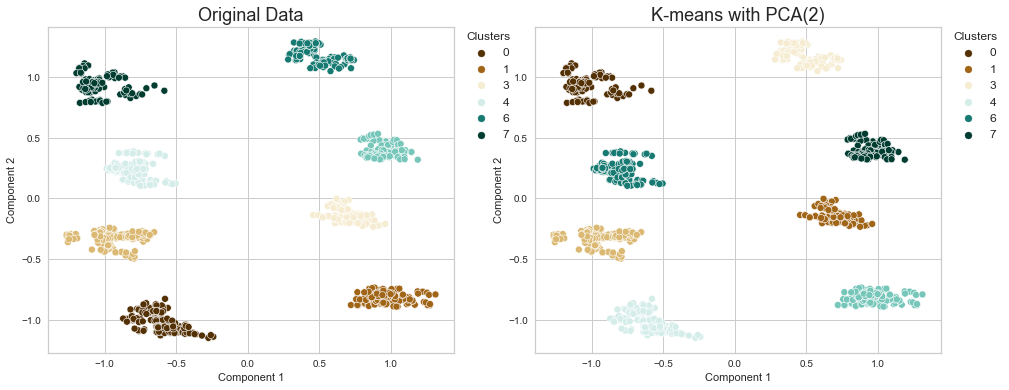

In [64]:
plt.figure(figsize=(16, 6)) 
plt.subplot(1,2,1)

sns.scatterplot(x = 'Component 1', y = 'Component 2', data = df_pca_2, hue = 'class', palette='BrBG')
plt.title('Original Data', fontsize=18)
plt.legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='medium')

plt.subplot(1,2,2)

sns.scatterplot(x = 'Component 1', y = 'Component 2', data = df_pca_2, hue = 'km_label_3', palette='BrBG')
plt.title('K-means with PCA(2)', fontsize=18)
plt.legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='medium')

plt.show()

### Model Comparison based on Inertia and Silhouette Score:

In [65]:
Model_Comparison = pd.DataFrame({
'Model' : ['K-means_1', 'K-means_PCA(6)', 'K-means_PCA(2)'],
'Inertia_Score' : [inertia_1, inertia_2, inertia_3],
'Silhouette_Score' : [silh_score_1, silh_score_2, silh_score_3]})

Model_Comparison_df = Model_Comparison.sort_values(by='Inertia_Score', ascending=True)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

,Model,Inertia_Score,Silhouette_Score
0,K-means_PCA(2),18.874802,0.768221
1,K-means_PCA(6),660.142214,0.447977
2,K-means_1,1182.580135,0.319815


### Conclusion on K-Means:
After running the Elbow method on WCSS and Silhouette score, we concluded that the best number of clusters are eight. <br>
After application of K-means on raw/unchanged data our results were poor: very high Inertia plus Silhouette Score very close to zero. <br>
Then we have applied PCA with 6 components after checking that this will remain 80% of variance explained. The results have improved a lot. <br>
The last step was to apply PCA with 2 components only, understanding that the two components hold only 39% of the variance explained. The Inertia and Silhouette Scores are significantly improved this time.



## B) K-Medoids <br>
Next we will implement K_Medoids classifier to our data. The first step is to install scikit-learn-extra and to import KMedois from sklearn library.

In [66]:
#!pip install scikit-learn-extra

In [67]:
from sklearn_extra.cluster import KMedoids

### We will create KMedoids classifier with 8 clusters:

In [68]:
Medoids_1 = KMedoids(n_clusters=8, random_state=0, method='pam', init='k-medoids++')

#### Here, we are using method parameter 'pam' as it proved that the results are better with it, changes of 'init' did not make any impact on results, we have decided to use k-medoids++

‘k-medoids++’ follows an approach based on k-means++_, and in general, gives initial medoids which are more separated than those generated by the other methods.<br>

source: https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html

#### Applying classifier to original/raw data: we will check the Inertia and Silhouette Score

In [69]:
Medoids_1 = Medoids_1.fit(df_scaled)
inertia_4 = Medoids_1.inertia_
print('The clusters are:  ', Medoids_1.labels_)
print('The Inertia is:   ', Medoids_1.inertia_ )

The clusters are:   [1 1 1 ... 5 5 5]
The Inertia is:    1199.0511024428902


In [70]:
Medoids_label_1 = Medoids_1.predict(df_scaled)
silh_score_4 = silhouette_score(df_scaled, Medoids_label_1)
print(f'Silhouette Score(n = 2): {silhouette_score(df_scaled, Medoids_label_1)}')

Silhouette Score(n = 2): 0.31981543590845335


### K-Medoids with PCA 2 Components <br>
#### Using data after PCA with 2 components as that was best result for KMeans, assuming it will be same case for KMedoids:

In [71]:
Medoids_2 = KMedoids(n_clusters=8, random_state=0)
Medoids_2 = Medoids_2.fit(df_pca)
Medoids_label_2 = Medoids_2.predict(df_pca)
inertia_5 = Medoids_2.inertia_
print('Inertia :', inertia_5)

Inertia : 483.5172586601007


Silhoutte Score

In [72]:
silh_score_5 = silhouette_score(df_pca, Medoids_label_2)
print('SILHOUETTE :', silhouette_score(df_pca, Medoids_label_2))

SILHOUETTE : 0.4133791080694095


In [73]:
columns = ['Medoids_label_2']
Medoids_label_2 = pd.DataFrame(data=Medoids_label_2, columns=columns)
Medoids_label_2.head()

,Medoids_label_2
0,1
1,1
2,1
3,1
4,1


Ceate new dataframe "df_pca_2"

In [74]:
df_pca_2 = pd.concat([df_pca_2, Medoids_label_2], axis=1)

In [75]:
df_pca_2.head()

,Component 1,Component 2,km_label_3,class,Medoids_label_2
0,-0.804618,-1.007160,4,0,1
1,-0.822809,-1.002333,4,0,1
2,-0.846543,-0.996492,4,0,1
3,-0.811094,-0.998073,4,0,1
4,-0.835360,-0.997919,4,0,1


Plot 'K-Medoids with PCA (2 components)

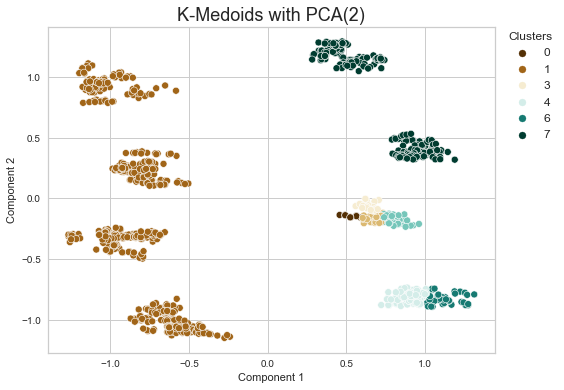

In [76]:
plt.figure(figsize=(8, 6)) 

sns.scatterplot(x = 'Component 1', y = 'Component 2', data = df_pca_2, hue = 'Medoids_label_2', palette='BrBG')
plt.title('K-Medoids with PCA(2)', fontsize=18)
plt.legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='medium')

plt.show()

The silhouette score is much worse for this algorithm and also the split of the clusters is much worse.

#### Model Comparison of KMeans and KMedoids Implementation

In [77]:
KMeans_KMedoids_Model_Comparison = pd.DataFrame({
'Model' : ['K-means_1', 'K-means_PCA(6)', 'K-means_PCA(2)', 'KMedoids', 'KMedoids_PCA(2)'],
'Silhouette_Score' : [silh_score_1, silh_score_2, silh_score_3, silh_score_4, silh_score_5],
'Inertia_Score' : [inertia_1, inertia_2, inertia_3, inertia_4, inertia_5]})

KMeans_KMedoids_Model_Comparison = KMeans_KMedoids_Model_Comparison.sort_values(by='Silhouette_Score', ascending=False)
KMeans_KMedoids_Model_Comparison = KMeans_KMedoids_Model_Comparison.set_index('Model')
KMeans_KMedoids_Model_Comparison.reset_index()

,Model,Silhouette_Score,Inertia_Score
0,K-means_PCA(2),0.768221,18.874802
1,K-means_PCA(6),0.447977,660.142214
2,KMedoids_PCA(2),0.413379,483.517259
3,K-means_1,0.319815,1182.580135
4,KMedoids,0.319815,1199.051102


### Preliminary Conclusion after KMeans and KMedoids Implementation

After comparison of the K-Means and K-Medoids models we can conclude that the best in view of Inertia score and Silhouette score is the K-Means with data after PCA with two components.<br>

## C) DBSCAN <br>
#### As proven by K-Means and K-Medoids already the data after PCA with 2 components is giving best results therefore going forward we are using the dataframe created after PCA to our alogorithms.

First step: To be able to decide on eps parameter for DBSCAN classifier we will first try to find the best Epsilon using NearestNeighbors algorithm. We import NearestNeighbors from sklearn. <br>
We will first initialise an object 'neigh# by calling method NearestNeighbors(), which will then train the model by calling a method fit() on our dataframe. We will then store the distance and indices into distances and indices arrays and print them.

In [78]:
from sklearn.neighbors import NearestNeighbors


neigh = NearestNeighbors(n_neighbors = 2)


nbrs = neigh.fit(df_pca)


distances, indices = nbrs.kneighbors(df_pca)

print(distances, indices)

[[0.         0.01115877]
 [0.         0.01133867]
 [0.         0.00376831]
 ...
 [0.         0.01729944]
 [0.         0.0026668 ]
 [0.         0.00369198]] [[   0    3]
 [   1    7]
 [   2    5]
 ...
 [1077 1075]
 [1078 1051]
 [1079 1059]]


#### Elbow method for selecting Epsilon: In order to plot, we will sort the distances in order to visualize them.


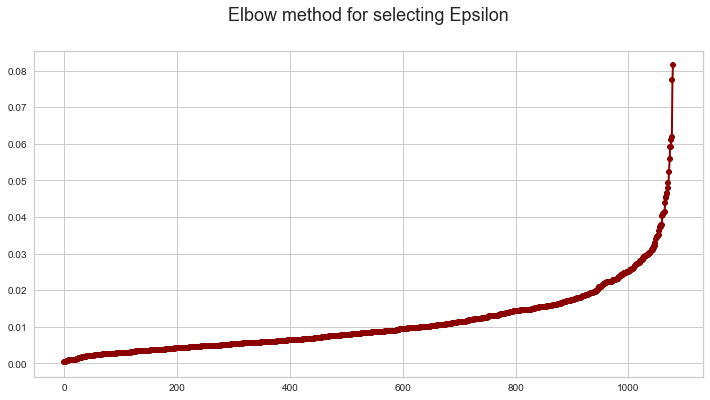

In [79]:
plt.figure(figsize=(12, 6)) 
distances = np.sort(distances, axis = 0) 
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances, color='darkred', linewidth=2, marker = '8') 
plt.title('Elbow method for selecting Epsilon', fontsize=18, pad=30)
plt.show() 

### DBSCAN 1 <br>
The first DBSCAN model called "dbs_model_1" based on the following parameter selctions: eps = 0.03, number of min_samples = 15.

First step will be to import DBSCAN from sklearn library. For the following implementation, we will follow the same steps, just changing the parameter (eps and min_samples) accoridngly. <br>
1. Initialise an object by calling a method DBSCAN along with parameters as eps and min_samples <br>
2. Train the model by calling a method fit()

In [80]:
from sklearn.cluster import DBSCAN


dbscan_opt_1 = DBSCAN(eps = 0.03, min_samples = 15)

dbs_model_1 = dbscan_opt_1.fit(df_pca)

Storing the labels formed by the DBSCAN as 'dbs_labels_1'

In [81]:
dbs_labels_1 = dbs_model_1.labels_

In [82]:
df_pca_2['dbs_labels_1'] = dbs_labels_1

Identifying which points make up “core points” and print them

In [83]:
core_samples_dbs_1 = np.zeros_like(dbs_labels_1, dtype=bool)
core_samples_dbs_1[dbscan_opt_1.core_sample_indices_] = True
print(core_samples_dbs_1)

[False False False ... False  True False]


Calculating the number of clusters and noise points

In [84]:
n_clusters_1 = len(set(dbs_labels_1)) - (1 if -1 in dbs_labels_1 else 0)
print('Estimated number of clusters: %d' % n_clusters_1)

Estimated number of clusters: 12


In [85]:
n_noise_1 = list(dbs_labels_1).count(-1)
print('Estimated number of noise points: %d' % n_noise_1)

Estimated number of noise points: 699


Print the Silhouette Score for DBSCAN model 1

In [86]:
silh_score_dbs_1 = silhouette_score(df_pca, dbs_labels_1)
print("Silhoette Coefficient for DBSCAN model 1:",  silh_score_dbs_1)

Silhoette Coefficient for DBSCAN model 1: -0.2947263805308779


We can see that this model is not able to correctly recognise clusters <br>
The silhouette score isn't very bad and we would expect the model to do better job.

### DBSCAN 2 <br>

The second DBSCAN model called "dbs_model_2" based on the following parameter selctions: eps = 0.08, min_samples = 15 (choose this time the highest eps of 0.08)

Initialise an object by calling a method DBSCAN along with parameters as eps and min_samples and then train the model by calling a method fit()

In [88]:
dbscan_opt_2 = DBSCAN(eps = 0.08, min_samples = 15)

dbs_model_2 = dbscan_opt_2.fit(df_pca)

In [89]:
df_pca_2['dbs_labels_2'] = dbs_model_2.labels_
dbs_labels_2 = dbs_model_2.labels_

Declare the number of clusters and noise points

In [90]:
n_clusters_2 = len(set(dbs_labels_2)) - (1 if -1 in dbs_labels_2 else 0)
print('Estimated number of clusters: %d' % n_clusters_2)

Estimated number of clusters: 9


In [91]:
n_noise_2 = list(dbs_labels_2).count(-1)
print('Estimated number of noise points: %d' % n_noise_2)

Estimated number of noise points: 57


Silhouette Coefficient for DBSCAN model 2

In [92]:
silh_score_dbs_2 = silhouette_score(df_pca, dbs_labels_2)
print("Silhoette Coefficient for DBSCAN model 2:",  silh_score_dbs_2)

Silhoette Coefficient for DBSCAN model 2: 0.6858996152068747


We can see that DBSCAN model 2 with Epsilon 0.08 has improved a lot, still assigning lots of clusters with lots of noise areas despite the fact that the silhouette score is excellen close to 1.

### DBSCAN 3 <br>
The third DBSCAN model called "dbs_model_3" based on the following parameter selctions: eps = 0.03, min_samples = 10 (choose lower number for sample)

Initialise an object by calling a method DBSCAN along with parameters as eps and min_samples and train the model by calling a method fit()

In [94]:
dbscan_opt_3 = DBSCAN(eps = 0.03, min_samples = 10)

dbs_model_3 = dbscan_opt_3.fit(df_pca)

In [95]:
df_pca_2['dbs_labels_3'] = dbs_model_3.labels_
dbs_labels_3 = dbs_model_3.labels_

Identify core samples

In [96]:
core_samples_dbs_3 = np.zeros_like(dbs_labels_3, dtype=bool)
core_samples_dbs_3[dbscan_opt_3.core_sample_indices_] = True
print(core_samples_dbs_3)

[False  True False ... False  True  True]


Declare the number of clusters and noise points

In [97]:
n_clusters_3 = len(set(dbs_labels_3)) - (1 if -1 in dbs_labels_3 else 0)
print('Estimated number of clusters: %d' % n_clusters_3)

Estimated number of clusters: 23


In [98]:
n_noise_3 = list(dbs_labels_3).count(-1)
print('Estimated number of noise points: %d' % n_noise_3)

Estimated number of noise points: 450


Silhouette Coefficient for DBSCAN model 3

In [99]:
silh_score_dbs_3 = silhouette_score(df_pca, dbs_labels_3)
print("Silhoette Coefficient for DBSCAN model 3:",  silh_score_dbs_3)

Silhoette Coefficient for DBSCAN model 3: -0.0344934856789563


### DBSCAN 4 <br>
The forth DBSCAN model called "dbs_model_4" based on the following parameter selections: eps = 0.08, min_samples = 5 (choose lower number for sample)

Initialise an object by calling a method DBSCAN along with parameters as eps and min_samples and train the model by calling a method fit()

In [101]:
dbscan_opt_4 = DBSCAN(eps = 0.08, min_samples = 5)

dbs_model_4 = dbscan_opt_4.fit(df_pca)

In [102]:
df_pca_2['dbs_labels_4'] = dbs_model_4.labels_
dbs_labels_4 = dbs_model_4.labels_

Identify core samples

In [103]:
core_samples_dbs_4 = np.zeros_like(dbs_labels_4, dtype=bool)
core_samples_dbs_4[dbscan_opt_4.core_sample_indices_] = True
print(core_samples_dbs_4)

[ True  True  True ...  True  True  True]


Declare the number of clusters and noise points

In [104]:
n_clusters_4 = len(set(dbs_labels_4)) - (1 if -1 in dbs_labels_4 else 0)
print('Estimated number of clusters: %d' % n_clusters_4)

Estimated number of clusters: 10


In [105]:
n_noise_4 = list(dbs_labels_4).count(-1)
print('Estimated number of noise points: %d' % n_noise_4)

Estimated number of noise points: 3


Silhouette Coefficient for DBSCAN model 4

In [106]:
silh_score_dbs_4 = silhouette_score(df_pca, dbs_labels_4)
print("Silhoette Coefficient for DBSCAN model 4:",  silh_score_dbs_4)

Silhoette Coefficient for DBSCAN model 4: 0.7196844233376308


### DBSCAN 5 <br>
The fifth DBSCAN model called "dbs_model_5" based on the following parameter selections:eps = 0.03, min_samples = 5 (choose lower number for sample)

Initialise an object by calling a method DBSCAN along with parameters as eps and min_samples and train the model by calling a method fit()

In [108]:
dbscan_opt_5 = DBSCAN(eps = 0.03, min_samples = 5)

dbs_model_5 = dbscan_opt_5.fit(df_pca)

In [109]:
df_pca_2['dbs_labels_5'] = dbs_model_5.labels_
dbs_labels_5 = dbs_model_5.labels_

Identify core samples

In [110]:
core_samples_dbs_5 = np.zeros_like(dbs_labels_5, dtype=bool)
core_samples_dbs_5[dbscan_opt_5.core_sample_indices_] = True
print(core_samples_dbs_5)

[ True  True  True ... False  True  True]


Declare the number of clusters and noise points

In [111]:
n_clusters_5 = len(set(dbs_labels_5)) - (1 if -1 in dbs_labels_5 else 0)
print('Estimated number of clusters: %d' % n_clusters_5)

Estimated number of clusters: 29


In [112]:
n_noise_5 = list(dbs_labels_5).count(-1)
print('Estimated number of noise points: %d' % n_noise_5)

Estimated number of noise points: 199


Silhouette Coefficient for DBSCAN model 5

In [113]:
silh_score_dbs_5 = silhouette_score(df_pca, dbs_labels_5)
print("Silhoette Coefficient for DBSCAN model 5:",  silh_score_dbs_5)

Silhoette Coefficient for DBSCAN model 5: 0.1939634817015508


## Compare Silhouette Coefficient for DBSCAN models

### Summary model details <br>
dbs_model_1: eps = 0.03, min_samples = 15 <br>
dbs_model_2: eps = 0.08, min_samples = 15 <br>
dbs_model_3: eps = 0.03, min_samples = 10 <br>
dbs_model_4: eps = 0.08, min_samples = 5 <br>
dbs_model_5: eps = 0.03, min_samples = 5 <br>

In [115]:
print("Silhoette Coefficient for DBSCAN model 1:",  silh_score_dbs_1, '12 clusters', '699 noise points')
print("Silhoette Coefficient for DBSCAN model 2:",  silh_score_dbs_2, '23 clusters', '88 noise points')
print("Silhoette Coefficient for DBSCAN model 3:",  silh_score_dbs_3, '24 clusters', '522 noise points')
print("Silhoette Coefficient for DBSCAN model 4:",  silh_score_dbs_4, '43 clusters', '22 noise points')
print("Silhoette Coefficient for DBSCAN model 5:",  silh_score_dbs_5, '53 clusters', '272 noise points')

Silhoette Coefficient for DBSCAN model 1: -0.2947263805308779 12 clusters 699 noise points
Silhoette Coefficient for DBSCAN model 2: 0.6858996152068747 23 clusters 88 noise points
Silhoette Coefficient for DBSCAN model 3: -0.0344934856789563 24 clusters 522 noise points
Silhoette Coefficient for DBSCAN model 4: 0.7196844233376308 43 clusters 22 noise points
Silhoette Coefficient for DBSCAN model 5: 0.1939634817015508 53 clusters 272 noise points


### Plotting and comparing visually all 5 models:

No handles with labels found to put in legend.


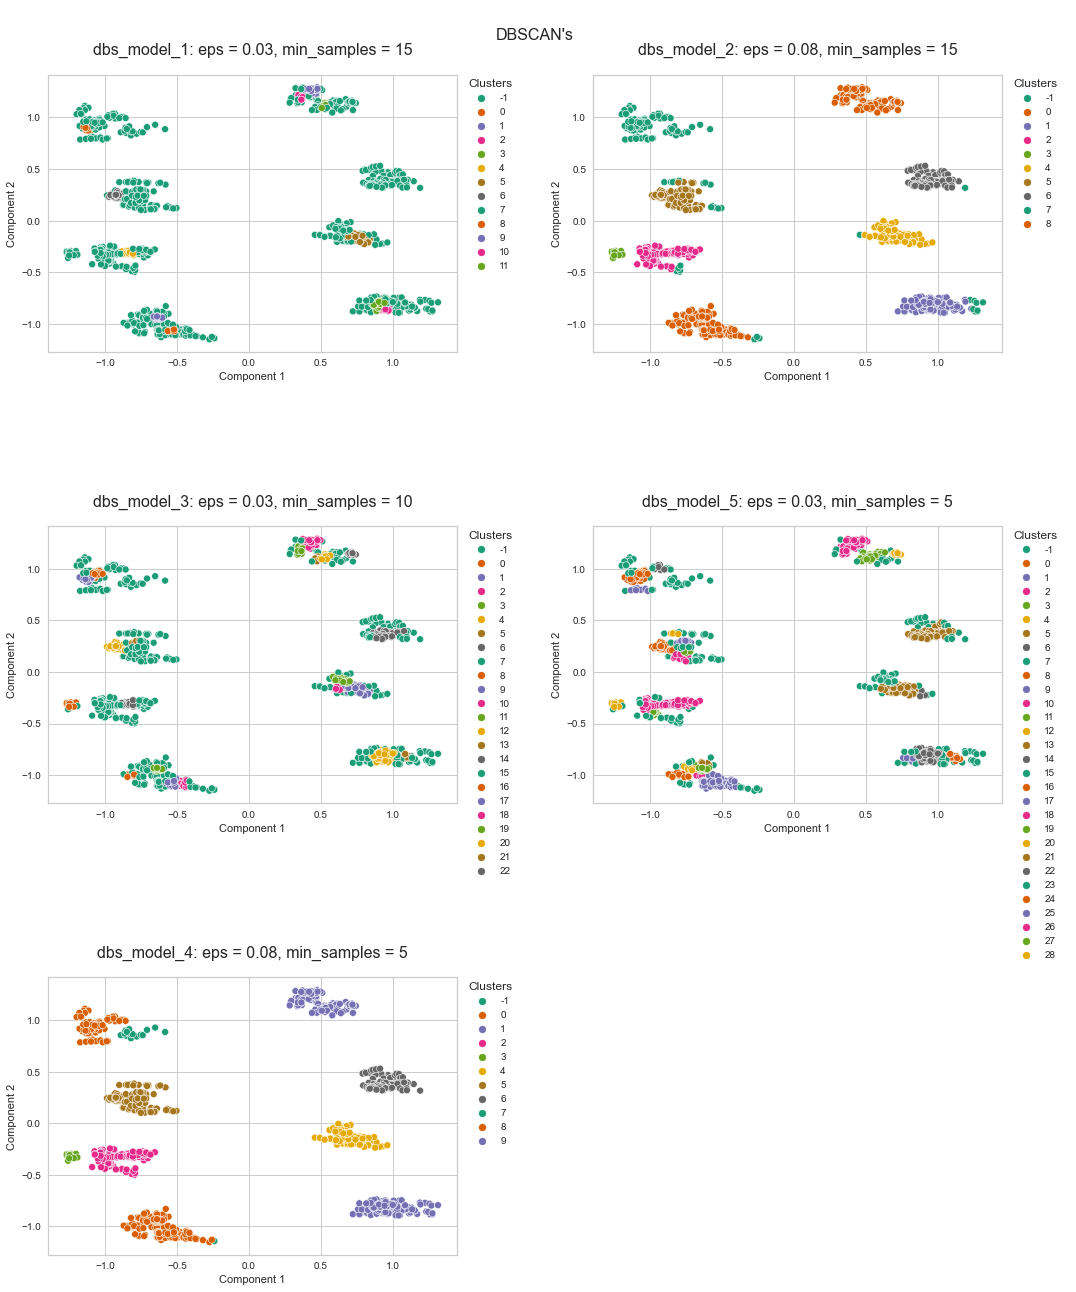

In [157]:
fig, axes = plt.subplots(3,2, figsize=(15,18))
axes[2][1].set_visible(False)

fig.suptitle("DBSCAN's",fontsize=16)
fig.legend()

# DBSCAN model 1
sns.scatterplot(ax=axes[0, 0],data=df_pca_2, x='Component 1', y='Component 2', hue='dbs_labels_1', palette='Dark2')
axes[0,0].set_title('dbs_model_1: eps = 0.03, min_samples = 15', fontsize=16, pad=20)
axes[0][0].legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')

# DBSCAN model 2
sns.scatterplot(ax=axes[0, 1],data=df_pca_2, x='Component 1', y='Component 2', hue='dbs_labels_2', palette='Dark2')
axes[0,1].set_title('dbs_model_2: eps = 0.08, min_samples = 15', fontsize=16, pad=20)
axes[0][1].legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')

# DBSCAN model 3
sns.scatterplot(ax=axes[1, 0],data=df_pca_2, x='Component 1', y='Component 2', hue='dbs_labels_3', palette='Dark2')
axes[1,0].set_title('dbs_model_3: eps = 0.03, min_samples = 10', fontsize=16, pad=20)
axes[1][0].legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')

# DBSCAN model 5
sns.scatterplot(ax=axes[1, 1],data=df_pca_2, x='Component 1', y='Component 2', hue='dbs_labels_5', palette='Dark2')
axes[1,1].set_title('dbs_model_5: eps = 0.03, min_samples = 5', fontsize=16, pad=20)
axes[1][1].legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')

# DBSCAN model 4
sns.scatterplot(ax=axes[2, 0],data=df_pca_2, x='Component 1', y='Component 2', hue='dbs_labels_4', palette='Dark2')
axes[2,0].set_title('dbs_model_4: eps = 0.08, min_samples = 5', fontsize=16, pad=20)
axes[2][0].legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')

fig.tight_layout(h_pad=2, w_pad=3)

In [116]:
DBSCAN_Model_Comparison = pd.DataFrame({
'Model' : ['DBSCAN model 1', 'DBSCAN model 2', 'DBSCAN model 3', 'DBSCAN model 4', 'DBSCAN model 5'],
'Silhouette_Score' : [silh_score_dbs_1, silh_score_dbs_2, silh_score_dbs_3, silh_score_dbs_4, silh_score_dbs_5],
'No of Clusters' : [n_clusters_1, n_clusters_2, n_clusters_3, n_clusters_4, n_clusters_5],
'No of Noise points': [n_noise_1, n_noise_2, n_noise_3, n_noise_4, n_noise_5]})

DBSCAN_Model_Comparison = DBSCAN_Model_Comparison.sort_values(by='Silhouette_Score', ascending=False)
DBSCAN_Model_Comparison = DBSCAN_Model_Comparison.set_index('Model')
DBSCAN_Model_Comparison.reset_index()

,Model,Silhouette_Score,No of Clusters,No of Noise points
0,DBSCAN model 4,0.719684,10,3
1,DBSCAN model 2,0.685900,9,57
2,DBSCAN model 5,0.193963,29,199
3,DBSCAN model 3,-0.034493,23,450
4,DBSCAN model 1,-0.294726,12,699


We have run the DBSCAN model 1 with all possible algorithms to see if that may decrease number of noise points but with no change. {'auto', 'ball_tree', 'kd_tree', 'brute'}

## Comment regarding Inertia as performance evaluation metric: 
Inertia measures the internal cluster sum of squares. Inertia is utilized to measure how related clusters are amongst themselves, the lower the inertia score the better. <br>

However, it is important to note that inertia heavily relies on the assumption that the clusters are convex (of spherical shape). DBSCAN does not necessarily divide data into spherical clusters, therefore inertia is not a good metric to use for evaluating DBSCAN models. <br>

source: https://www.engati.com/glossary/dbscan

## D) Optics Clustering Algorithm

##### Importing the required libraries

In [117]:
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 

#### Initialising PCA model for two components

In [118]:
pca = PCA(n_components=2, random_state=42)
pca_optics_2 = pca.fit(df_scaled).transform(df_scaled)

##### Building the Clustering Model <br>
We are building the OPTICS Clustering model with the following parameter: min_samples = 50, xi = 0.05, min_cluster_size = 0.05. In the next step we will run the fit method to train the data.

In [119]:
optics_model = OPTICS(min_samples = 50, xi = 0.05, min_cluster_size = 0.05)


optics_model.fit(pca_optics_2)
optic_labels = optics_model.labels_

Silhouette Score

In [120]:
silhouette_score_opt = silhouette_score(pca_optics_2, optic_labels)
print(silhouette_score_opt)

0.7244563394438484


##### Storing the results of the training. As per findings while running Elbow method for Epsilon we concluded to continue using epsilon= 0.8 and epsilon=0.3 for the DBSCAN.

In [121]:
# Producing the labels according to the DBSCAN technique with eps = 0.3 
labels_030 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 0.3)

# Producing the labels according to the DBSCAN technique with eps = 0.8
labels_080 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 0.8)
  
# Creating a numpy array with numbers at equal spaces till 
# the specified range 
space = np.arange(len(pca_optics_2)) 
  
# Storing the reachability distance of each point 
reachability = optics_model.reachability_[optics_model.ordering_] 
  
# Storing the cluster labels of each point 
labels = optics_model.labels_[optics_model.ordering_] 
  
print(labels) 

[0 0 0 ... 7 7 7]


Silhouette Score for dbs03

In [122]:
silhouette_score_dbs03 = silhouette_score(pca_optics_2, labels_030)
silhouette_score_dbs03

0.7682209605821667

Silhouette Score for dbs08

In [123]:
silhouette_score_dbs08 = silhouette_score(pca_optics_2, labels_080)
silhouette_score_dbs08

0.539215523900099

##### Visualizing the results for dbs03 and dbs08

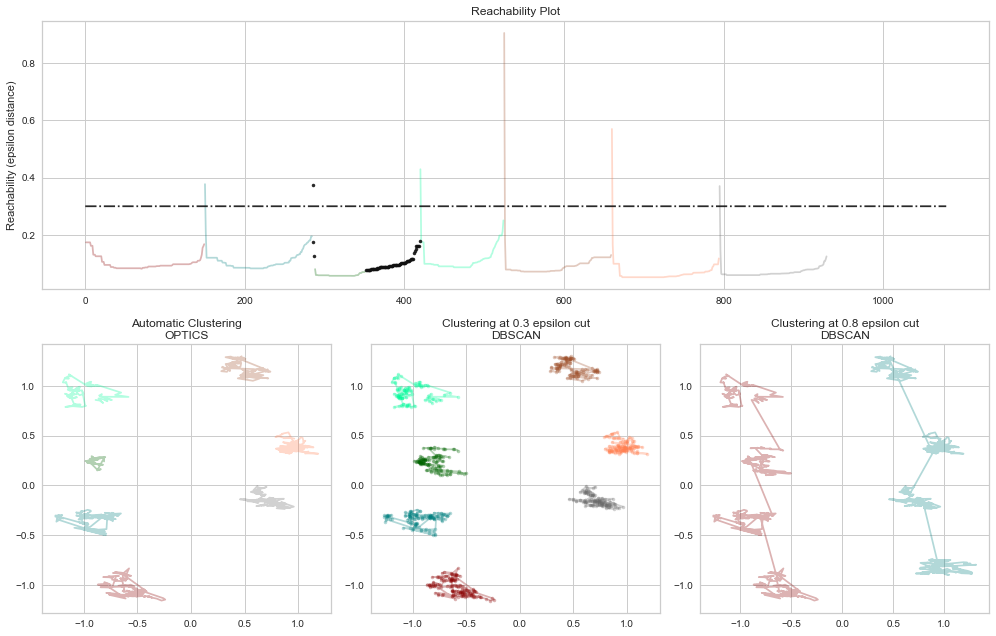

In [124]:
# Defining the framework of the visualization 
# Size of the figure and Grid
plt.figure(figsize=(14, 9))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Plotting the Reachability-Distance Plot 
colors = ['darkred', 'teal', 'darkgreen', 'mediumspringgreen', 'sienna', 'coral', 'dimgray', 'steelblue']
for klass, color in zip(range(0, 7), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.9)
ax1.plot(space, np.full_like(space, 0.3, dtype = float), 'k-.', alpha = 0.9)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# Plotting the OPTICS Clustering 
colors = ['darkred', 'teal', 'darkgreen', 'mediumspringgreen', 'sienna', 'coral', 'dimgray', 'steelblue']
for klass, color in zip(range(0, 7), colors):
    Xk = pca_optics_2[optics_model.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha = 0.3)
ax2.plot(pca_optics_2[optics_model.labels_ == -1, 0], pca_optics_2[optics_model.labels_ == -1, 1], 'k+', alpha = 0.3)
ax2.set_title('Automatic Clustering\nOPTICS')

# Plotting the DBSCAN Clustering with eps = 0.3 
colors = ['darkred', 'teal', 'darkgreen', 'mediumspringgreen', 'sienna', 'coral', 'dimgray', 'steelblue']
for klass, color in zip(range(0, 7), colors):
    Xk = pca_optics_2[labels_030 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha = 0.3, marker = '.')
ax3.plot(pca_optics_2[labels_030 == -1, 0], pca_optics_2[labels_030 == -1, 1], 'k+', alpha = 0.3)
ax3.set_title('Clustering at 0.3 epsilon cut\nDBSCAN')

# Plotting the DBSCAN Clustering with eps = 0.8
colors = ['darkred', 'teal', 'darkgreen', 'mediumspringgreen', 'sienna', 'coral', 'dimgray', 'steelblue']
for klass, color in zip(range(0, 7), colors):
    Xk = pca_optics_2[labels_080 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha = 0.3)
ax4.plot(pca_optics_2[labels_080 == -1, 0], pca_optics_2[labels_080 == -1, 1], 'k+', alpha = 0.3)
ax4.set_title('Clustering at 0.8 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()

By applying the Optics above we can identy 5 clusters. However when we apply DBSCAN, the performance is not as good. The algorism is applied to all data points below the continoues horizontal line. If there was any data above it, it would be considered as noise, therefore we can see there is no noise within this dataset.

By Applying the Optics we can see that Automatic Clustering Optics identified 7 clusters, when applying the DBSCAN with epsilon 0.3 there are still 7 clusters but one of them has more points.  When DBSCAN applied with 0.8 epsilon as the highest possible the clusters are only two even though the data plot indicates 8.

### Comparing Optics models based on the Silhouette score

In [125]:
Optics_Model_Comparison = pd.DataFrame({
'Model' : ['Optics', 'DBSCAN_030', 'DBSCAN_080'],
'Silhouette_Score' : [silhouette_score_opt, silhouette_score_dbs03, silhouette_score_dbs08]})

Optics_Model_Comparison  = Optics_Model_Comparison.sort_values(by='Silhouette_Score', ascending=False)
Optics_Model_Comparison  = Optics_Model_Comparison.set_index('Model')
Optics_Model_Comparison.reset_index()

,Model,Silhouette_Score
0,DBSCAN_030,0.768221
1,Optics,0.724456
2,DBSCAN_080,0.539216


## E) Agglomerative Hierarchical Clustering

Complete-linkage calculates the maximum distance between clusters before merging. <br>
Centroid-linkage finds centroid of cluster 1 and of cluster 2, and then calculates the distance between the two before merging. <br> 
Ward linkage is the default choice, and selects the two clusters to merge on the basis of the least increase to variance within all clusters. Frequently, the result is equally sized clusters. Starting, each point has its own cluster and two clusters are merged at each step. <br>

One limitation of agglomeration clustering is the inability to make predictions for new data points. As a result, Agglomerative Clustering does not have a predict method. A dendrogram is a tool to visualize multidimensional datasets. Agglomerative clustering allows for a hierarchy or data partition options, which can be visualised via dendrograms (Muller and Guido, 2016).

Another type of hierarchical clustering not used here is Divisive Clustering. All observations are assigned to a single cluster in Divisive Clustering and step-wise a cluster is partitioned to two least similar clusters.

Import the needed libraries from scipy

In [126]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import sklearn.metrics as sm

To implement Agglomerative Hierarchical Clustering the following steps have to be taken: <br>
#Step 1: Data pre-processing (already completed in earlier steps) <br>
#Step 2: Finding the optimal number of clusters using the dendrogram <br>
#Step 3: Training the hierarchical clustering model <br>
#Step 4: Visualization of the clusters <br>

Plot by calling the method dendrogram by using an object (shc)

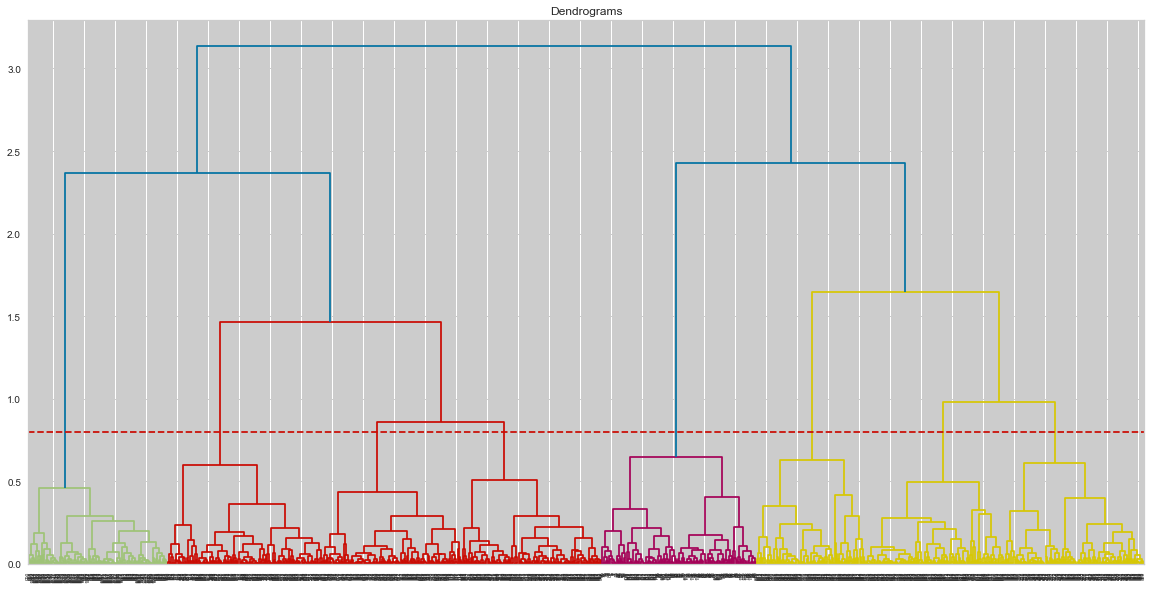

In [127]:
# Size of the figure
plt.figure(figsize=(20, 10))  

# Title of the Dendrogram
plt.title("Dendrograms")

# Call the method dendrogram by using an object (shc)
dend = shc.dendrogram(shc.linkage(df_pca, method = 'complete'))

# Draw the red line to cut the dendrogram
plt.axhline(y = 0.8, color = 'r', linestyle = '--')

#### 1. Agglomerative Clustering - linkage 'ward' and affinity 'euclidean'<br>
First we will import  AgglomerativeClustering from sklearn and then initialise the cluster using a method AgglomerativeClustering and then train the model by calling a method fit()

In [128]:
from sklearn.cluster import AgglomerativeClustering

hc_1 = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  

hc_1_model = hc_1.fit(df_pca)

In [129]:
hc_1_labels = hc_1_model.labels_
df_pca_2['hc_1_labels'] = hc_1_labels

Silhoette Coefficient for HC_1 

In [130]:
silh_score_hc_1 = silhouette_score(df_pca, hc_1_labels)
print('Silhoette Coefficient for HC_1:',  silh_score_hc_1)

Silhoette Coefficient for HC_1: 0.7682209605821667


Display cluster size

In [131]:
len(df_pca_2[hc_1_labels==0]),len(df_pca_2[hc_1_labels==1]),len(df_pca_2[hc_1_labels==2]),len(df_pca_2[hc_1_labels==3]),len(df_pca_2[hc_1_labels==4]),len(df_pca_2[hc_1_labels==5]),len(df_pca_2[hc_1_labels==6]),len(df_pca_2[hc_1_labels==7])

(135, 150, 135, 135, 150, 105, 135, 135)

#### 2. Agglomerative Clustering - linkage 'complete' and affinity 'l2'

In [133]:
hc_2 = AgglomerativeClustering(n_clusters=8, affinity='l2', linkage='complete')  

hc_2_model = hc_2.fit(df_pca)


In [134]:
hc_2_labels = hc_2_model.labels_
df_pca_2['hc_2_labels'] = hc_2_labels

Silhoette Coefficient for HC_2

In [135]:
silh_score_hc_2 = silhouette_score(df_pca, hc_2_labels)
print('Silhoette Coefficient for HC_2:',  silh_score_hc_2)

Silhoette Coefficient for HC_2: 0.7682209605821667


Display cluster size

In [136]:
len(df_pca_2[hc_2_labels==0]),len(df_pca_2[hc_2_labels==1]),len(df_pca_2[hc_2_labels==2]),len(df_pca_2[hc_2_labels==3]),len(df_pca_2[hc_2_labels==4]),len(df_pca_2[hc_2_labels==5]),len(df_pca_2[hc_2_labels==6]),len(df_pca_2[hc_2_labels==7])

(150, 105, 150, 135, 135, 135, 135, 135)

#### 3. Agglomerative Clustering - linkage 'average' and affinity 'manhattan'

In [138]:
hc_3 = AgglomerativeClustering(n_clusters=8, affinity='manhattan', linkage='average')  

hc_3_model = hc_3.fit(df_pca)


In [139]:
hc_3_labels = hc_3_model.labels_
df_pca_2['hc_3_labels'] = hc_3_labels

Silhoette Coefficient for HC_3

In [140]:
silh_score_hc_3 = silhouette_score(df_pca, hc_3_labels)
print('Silhoette Coefficient for HC_3:',  silh_score_hc_3)

Silhoette Coefficient for HC_3: 0.7682209605821667


Display cluster size

In [141]:
len(df_pca_2[hc_3_labels==0]),len(df_pca_2[hc_3_labels==1]),len(df_pca_2[hc_3_labels==2]),len(df_pca_2[hc_3_labels==3]),len(df_pca_2[hc_3_labels==4]),len(df_pca_2[hc_3_labels==5]),len(df_pca_2[hc_3_labels==6]),len(df_pca_2[hc_3_labels==7])

(150, 135, 135, 135, 105, 150, 135, 135)

#### 4. Agglomerative Clustering - linkage 'single' and affinity 'cosine'

In [143]:
hc_4 = AgglomerativeClustering(n_clusters=8, affinity='cosine', linkage='single')  

hc_4_model = hc_4.fit(df_pca)


In [144]:
hc_4_labels = hc_4_model.labels_
df_pca_2['hc_4_labels'] = hc_4_labels

Silhoette Coefficient HC_4

In [145]:
silh_score_hc_4 = silhouette_score(df_pca, hc_4_labels)
print('Silhoette Coefficient for HC_4:',  silh_score_hc_4)

Silhoette Coefficient for HC_4: 0.6372881600974213


Display cluster size

In [146]:
len(df_pca_2[hc_4_labels==0]),len(df_pca_2[hc_4_labels==1]),len(df_pca_2[hc_4_labels==2]),len(df_pca_2[hc_4_labels==3]),len(df_pca_2[hc_4_labels==4]),len(df_pca_2[hc_4_labels==5]),len(df_pca_2[hc_4_labels==6]),len(df_pca_2[hc_4_labels==7])

(238, 150, 150, 135, 135, 135, 135, 2)

No handles with labels found to put in legend.


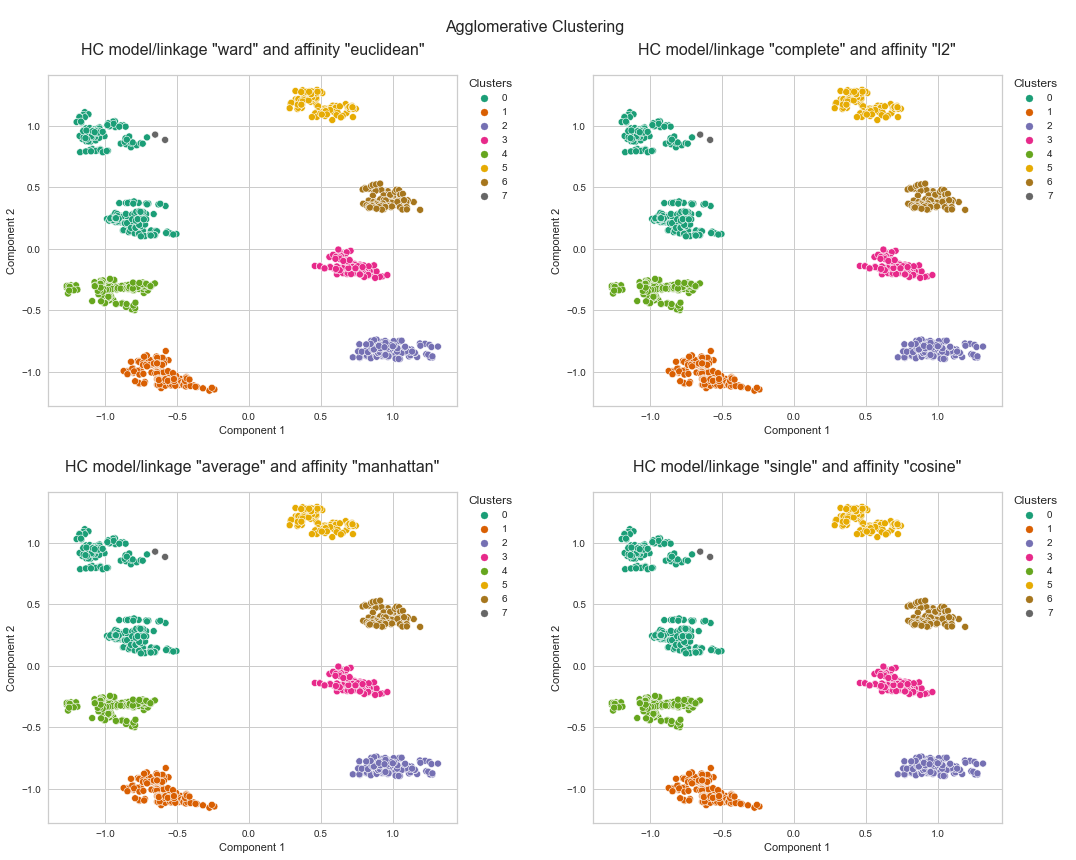

In [158]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

fig.suptitle("Agglomerative Clustering",fontsize=16)
fig.legend()

# DBSCAN model 1
sns.scatterplot(ax=axes[0, 0],data=df_pca_2, x='Component 1', y='Component 2', hue='hc_4_labels', palette='Dark2')
axes[0,0].set_title('HC model/linkage "ward" and affinity "euclidean"', fontsize=16, pad=20)
axes[0][0].legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')

# DBSCAN model 2
sns.scatterplot(ax=axes[0, 1],data=df_pca_2, x='Component 1', y='Component 2', hue='hc_4_labels', palette='Dark2')
axes[0,1].set_title('HC model/linkage "complete" and affinity "l2"', fontsize=16, pad=20)
axes[0][1].legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')

# DBSCAN model 3
sns.scatterplot(ax=axes[1, 0],data=df_pca_2, x='Component 1', y='Component 2', hue='hc_4_labels', palette='Dark2')
axes[1,0].set_title('HC model/linkage "average" and affinity "manhattan"', fontsize=16, pad=20)
axes[1][0].legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')

# DBSCAN model 5
sns.scatterplot(ax=axes[1, 1],data=df_pca_2, x='Component 1', y='Component 2', hue='hc_4_labels', palette='Dark2')
axes[1,1].set_title('HC model/linkage "single" and affinity "cosine"', fontsize=16, pad=20)
axes[1][1].legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')



fig.tight_layout(h_pad=2, w_pad=3)

#### Model Comparison Agglomerative Clustering

In [148]:
HC_Model_Comparison = pd.DataFrame({
'Model' : ['HC model 1', 'HC model 2', 'HC model 3', 'HC model 4'],
'Silhouette Score': [silh_score_hc_1, silh_score_hc_2, silh_score_hc_3, silh_score_hc_4]})

HC_Model_Comparison = HC_Model_Comparison.sort_values(by='Silhouette Score', ascending=False)
HC_Model_Comparison = HC_Model_Comparison.set_index('Model')
HC_Model_Comparison.reset_index()

,Model,Silhouette Score
0,HC model 1,0.768221
1,HC model 2,0.768221
2,HC model 3,0.768221
3,HC model 4,0.637288


## F) Fuzzy C-Means Clusterings

First step is to install the following: --upgrade numba, daal4py and fuzzy-c-means

In [149]:
#!pip install --upgrade numba

In [150]:
#!pip install daal4py

In [151]:
#!pip install fuzzy-c-means

First step will be to import FCM from fcmeans library. Then we will Initialise an object fcm by calling a method FCM and fit the fuzzy-c-means on df_pca_hc. The outputs are stored fcm_centers and fcm_labels and argmax: returns the indices of the maximum values along an axis.

In [152]:
from fcmeans import FCM

pca = PCA(n_components=2, random_state=42)
df_pca_hc = pca.fit(df_scaled).transform(df_scaled)

# Initialise an object fcm by calling a method FCM
fcm = FCM(n_clusters = 8)

# fit the fuzzy-c-means
fcm_model = fcm.fit(df_pca_hc)

# outputs are stored fcm_centers and fcm_labels
fcm_centers = fcm.centers

# argmax: Returns the indices of the maximum values along an axis.
fcm_labels = fcm.u.argmax(axis = 1)

In [153]:
df_pca_2['fcm_labels'] = fcm_labels

Silhoette Coefficient 

In [154]:
silh_score_fcm = silhouette_score(df_pca, fcm_labels)
print('Silhoette Coefficient:',  silh_score_fcm)

Silhoette Coefficient: 0.7682209605821667


Plot with fcm_labels

Text(0.5, 1.0, 'Fuzzy C-Means Clusterings')

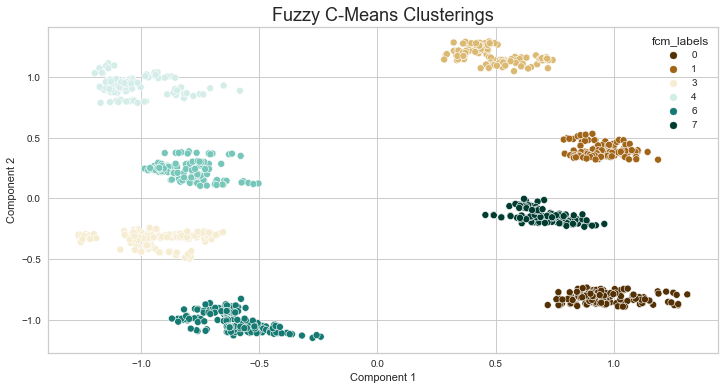

In [155]:
plt.figure(figsize=(12, 6)) 
sns.scatterplot(data=df_pca_2, x='Component 1', y='Component 2', hue='fcm_labels', palette='BrBG')
plt.title('Fuzzy C-Means Clusterings', fontsize=18)

## Comparison of all Clustering Models based on Silhouette Score:

In [156]:
All_Model_Comparison = pd.DataFrame({
'Model' : ['K-means_org', 'K-meansPCA(6)', 'K-meansPCA(2)', 'K-Medoids_org', 'K-MedoidsPCA(2)',
           'DBSCAN model 1', 'DBSCAN model 2', 'DBSCAN model 3', 'DBSCAN model 4', 'DBSCAN model 5',
           'Optics', 'DBSCAN_030', 'DBSCAN_080',
           'HC model 1', 'HC model 2', 'HC model 3', 'HC model 4', 'FCM_model'],
'Silhouette Score': [silh_score_1, silh_score_2, silh_score_3, silh_score_4, silh_score_5,
                     silh_score_dbs_1, silh_score_dbs_2, silh_score_dbs_3, silh_score_dbs_4, silh_score_dbs_5,
                     silhouette_score_opt, silhouette_score_dbs03, silhouette_score_dbs08,
                     silh_score_hc_1, silh_score_hc_2, silh_score_hc_3, silh_score_hc_4, silh_score_fcm]})

All_Model_Comparison = All_Model_Comparison.sort_values(by='Silhouette Score', ascending=False)
All_Model_Comparison = All_Model_Comparison.set_index('Model')
All_Model_Comparison.reset_index()

,Model,Silhouette Score
0,FCM_model,0.768221
1,HC model 1,0.768221
2,K-meansPCA(2),0.768221
3,HC model 3,0.768221
4,HC model 2,0.768221
5,DBSCAN_030,0.768221
6,Optics,0.724456
7,DBSCAN model 4,0.719684
8,DBSCAN model 2,0.685900
9,HC model 4,0.637288


## Prediction using KNN neighbors Classifier 

In [159]:
X2 = df_pca_2[['Component 1', 'Component 2']]
y2 = df_pca_2[['hc_1_labels']]

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2, train_size=0.8,test_size=0.2,random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((864, 2), (216, 2), (864, 1), (216, 1))

In [162]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
kNN = KNeighborsClassifier()

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test)

In [163]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 1.00


In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        25

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

[[29  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0]
 [ 0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0 21  0]
 [ 0  0  0  0  0  0  0 25]]


#### K-Means vs Hierarchical 
Both K-Means and Hierarchical performed very well on our dataset. In general how to choose between them?:

1. If there is a specific number of clusters in the dataset, but the group they belong to is unknown, choose K-means <br>
2. If the distinguishes are based on prior beliefs, hierarchical clustering should be used to know the number of clusters<br>
3. With a large number of variables, K-means compute faster <br>
4. The result of K-means is unstructured, but that of hierarchal is more interpretable and informative<br>
5. It is easier to determine the number of clusters by hierarchical clustering’s dendrogram<br>

Types of clustering algorithms
Since the task of clustering is subjective, the means that can be used for achieving this goal are plenty. Every methodology follows a different set of rules for defining the ‘similarity’ among data points. 

1. <b>Connectivity models:</b> As the name suggests, these models are based on the notion that the data points closer in data space exhibit more similarity to each other than the data points lying farther away. These models can follow two approaches. In the first approach, they start with classifying all data points into separate clusters & then aggregating them as the distance decreases. In the second approach, all data points are classified as a single cluster and then partitioned as the distance increases. Also, the choice of distance function is subjective. These models are very easy to interpret but lacks scalability for handling big datasets. Examples of these models are <b> hierarchical clustering algorithm and its variants.</b><br>
2. <b> Centroid models:</b> These are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters. <b> K-Means clustering </b> algorithm is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.<br>
3. <b> Distribution models:</b> These clustering models are based on the notion of how probable is it that all data points in the cluster belong to the same distribution (For example: Normal, Gaussian). These models often suffer from overfitting. A popular example of these models is Expectation-maximization algorithm which uses multivariate normal distributions.<br>
Gaussian mixture models were not in scope of our project. <br.
4. <b> Density Models:</b> These models search the data space for areas of varied density of data points in the data space. It isolates various different density regions and assign the data points within these regions in the same cluster. Popular examples of density models are<b> DBSCAN and OPTICS </b>.<br>

source: https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/#:~:text=6.-,Difference%20between%20K%20Means%20and%20Hierarchical%20clustering,i.e.%20O(n2).
